In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing

sns.set() # set seaborn's default settings

First and Foremost, the dataframe has 5 basically empty rows at the top as downloaded from the source: https://www.phase-trans.msm.cam.ac.uk/map/data/materials/austenitic.data.html   

(There is a naming convention for humans viewing the excel file.)  

This can be fixed by using the skiprows parameter in the read_excel function.

In [8]:
df = pd.read_excel('STMECH_AUS_SS.xls',skiprows=5) # skipping the first 5 rows of the excel file (6th row taken as column names)
df

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,Grains mm-2,Type of melting,Size of ingot,Product form,Temperature (K),0.2%proof_stress (M Pa),UTS (M Pa),Elongation (%),Area_reduction (%),Comments
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,298,280.000000,610.000000,67,83,NRIM/CDS/No4B/1986 ABA
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,373,243.000000,508.000000,54,83,NRIM/CDS/No4B/1986 ABA
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,473,220.000000,472.000000,44,81,NRIM/CDS/No4B/1986 ABA
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,573,204.000000,470.000000,43,76,NRIM/CDS/No4B/1986 ABA
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,673,197.000000,470.000000,45,76,NRIM/CDS/No4B/1986 ABA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Na,2,Na,1,723,171.616375,454.047895,34.9,Na,NaN
2176,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Na,2,Na,1,773,166.713050,435.415260,33,Na,NaN
2177,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Na,2,Na,1,823,169.655045,424.627945,34.2,Na,NaN
2178,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Na,2,Na,1,873,168.674380,398.149990,37.6,Na,NaN


In [9]:
df.index

RangeIndex(start=0, stop=2180, step=1)

In [10]:
df.columns

Index(['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Ti', 'Zr', 'Ta', 'V', 'W', 'Cu',
       'N', 'C', 'B', 'P', 'S', 'Co', 'Al', 'Sn', 'Pb',
       'Solution_treatment_temperature', 'Solution_treatment_time(s)',
       'Water_Quenched_after_s.t.', 'Air_Quenched_after_s.t.', 'Grains mm-2',
       'Type of melting', 'Size of ingot', 'Product form', 'Temperature (K)',
       '0.2%proof_stress (M Pa)', 'UTS (M Pa)', 'Elongation (%)',
       'Area_reduction (%)', 'Comments'],
      dtype='object')

In [11]:
# Lets rename the columns with easier names for our convenience
df = df.rename(columns={'Solution_treatment_temperature':'sol_temp',
                        'Solution_treatment_time(s)': 'sol_time',
                        'Water_Quenched_after_s.t.':'water_quench',
                        'Air_Quenched_after_s.t.':'air_quench',
                        'Grains mm-2':'grains',
                        'Type of melting':'melting_type',
                        'Size of ingot':'ingot_size',
                        'Product form':'product_form',
                        'Temperature (K)': 'temp',
                        '0.2%proof_stress (M Pa)': 'proof_stress',
                        'UTS (M Pa)': 'uts',
                        'Elongation (%)': 'elongation',
                        'Area_reduction (%)': 'area_reduction',
                        'Comments': 'comments'})
df.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,grains,melting_type,ingot_size,product_form,temp,proof_stress,uts,elongation,area_reduction,comments
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,298,280.0,610.0,67,83,NRIM/CDS/No4B/1986 ABA
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,373,243.0,508.0,54,83,NRIM/CDS/No4B/1986 ABA
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,473,220.0,472.0,44,81,NRIM/CDS/No4B/1986 ABA
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,573,204.0,470.0,43,76,NRIM/CDS/No4B/1986 ABA
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,477.712892,1,3,1,673,197.0,470.0,45,76,NRIM/CDS/No4B/1986 ABA


In [12]:
df.shape

(2180, 35)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cr              2180 non-null   float64
 1   Ni              2180 non-null   float64
 2   Mo              2180 non-null   float64
 3   Mn              2180 non-null   float64
 4   Si              2180 non-null   float64
 5   Nb              2180 non-null   float64
 6   Ti              2180 non-null   float64
 7   Zr              2180 non-null   int64  
 8   Ta              2180 non-null   int64  
 9   V               2180 non-null   float64
 10  W               2179 non-null   float64
 11  Cu              2180 non-null   float64
 12  N               2180 non-null   float64
 13  C               2180 non-null   float64
 14  B               2180 non-null   float64
 15  P               2180 non-null   float64
 16  S               2180 non-null   float64
 17  Co              2180 non-null   f

We can organize our data to get two main distinct lists for categorical and numerical columns.  

In [14]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['sol_temp', 'sol_time', 'water_quench', 'air_quench', 'grains', 'melting_type', 'ingot_size', 'elongation', 'area_reduction', 'comments']
numerical variables:  ['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Ti', 'Zr', 'Ta', 'V', 'W', 'Cu', 'N', 'C', 'B', 'P', 'S', 'Co', 'Al', 'Sn', 'Pb', 'product_form', 'temp', 'proof_stress', 'uts']


We can also inspect how many unique values are there in each column. This is useful to identify categorical variables that may have been misclassified as numerical due to their data type.

In [15]:
df.nunique(axis=0) 

Cr                132
Ni                145
Mo                 79
Mn                 71
Si                 54
Nb                 30
Ti                 54
Zr                  1
Ta                  1
V                  12
W                   1
Cu                 27
N                  48
C                  29
B                  27
P                  32
S                  32
Co                 18
Al                 41
Sn                  1
Pb                  1
sol_temp           20
sol_time           20
water_quench        3
air_quench          3
grains             43
melting_type        5
ingot_size         21
product_form        5
temp               20
proof_stress      371
uts               597
elongation        298
area_reduction     66
comments           60
dtype: int64

We can see from the output of our above nunquie() funciton that 5 is a value that can and should be considered categorical in this case espeically with how many rows of data we have.  
Beyond 5, the next number of uniques jumps up to 20+ for non physical element columns. This is a good indicator that we should consider 5 uniques as a categorical variable.

We can then see what those 5 or less unique values are with the following:

In [16]:
for col in df.columns:
    if df[col].nunique() <= 5:
        print(f'{col}: {df[col].unique()}')

Zr: [0]
Ta: [0]
W: [ 0. nan]
Sn: [0]
Pb: [0]
water_quench: [1 'Na' 0]
air_quench: [0 'Na' 1]
melting_type: [1 2 3 'Na' 4]
product_form: [1 2 3 4 5]


Ignoring the physical elements, we can see the that those are indeed categorical variables.

water_quench, air_quench, and melting_type, are already set as categorical in our 'cats' list, but product_form is in our numerical list, so lets fix that:  
Also, elongation and sol_temp showed up as an object (probably due to Na values), but there are many unique values and they are numbers so they can be moved to numerical:

In [17]:
cats.extend(['product_form'])
nums.remove('product_form')

nums.extend(['elongation'])
cats.remove('elongation')

nums.extend(['sol_temp'])
cats.remove('sol_temp')

print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['sol_time', 'water_quench', 'air_quench', 'grains', 'melting_type', 'ingot_size', 'area_reduction', 'comments', 'product_form']
numerical variables:  ['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Ti', 'Zr', 'Ta', 'V', 'W', 'Cu', 'N', 'C', 'B', 'P', 'S', 'Co', 'Al', 'Sn', 'Pb', 'temp', 'proof_stress', 'uts', 'elongation', 'sol_temp']


## `nan`s inspection

At this point we have noticed that some 'Na' values are appearing. From our df.info() funciton we saw non-null values for all columns. 

This is because the 'Na' values are strings and not NaN values. We can fix this by replacing all 'Na' values with NaN values, and then doing some null value inspeciton and dropping rows that include them if it is a small enough part of our dataset.

In [18]:
df = df.replace('Na', np.nan)
df.tail() # saw from earlier in the notebook the last 5 rows have 'Na' values so we can make sure they were replaced with NaN

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,grains,melting_type,ingot_size,product_form,temp,proof_stress,uts,elongation,area_reduction,comments
2175,17.7,12.28,0.0,1.24,0.3,0.83,0.0,0,0,0.0,...,NaN,2.0,NaN,1,723,171.616375,454.047895,34.9,NaN,NaN
2176,17.7,12.28,0.0,1.24,0.3,0.83,0.0,0,0,0.0,...,NaN,2.0,NaN,1,773,166.713050,435.415260,33.0,NaN,NaN
2177,17.7,12.28,0.0,1.24,0.3,0.83,0.0,0,0,0.0,...,NaN,2.0,NaN,1,823,169.655045,424.627945,34.2,NaN,NaN
2178,17.7,12.28,0.0,1.24,0.3,0.83,0.0,0,0,0.0,...,NaN,2.0,NaN,1,873,168.674380,398.149990,37.6,NaN,NaN
2179,17.7,12.28,0.0,1.24,0.3,0.83,0.0,0,0,0.0,...,NaN,2.0,NaN,1,973,139.254430,296.160830,45.4,NaN,NaN


In [19]:
df.isnull().any()

Cr                False
Ni                False
Mo                False
Mn                False
Si                False
Nb                False
Ti                False
Zr                False
Ta                False
V                 False
W                  True
Cu                False
N                 False
C                 False
B                 False
P                 False
S                 False
Co                False
Al                False
Sn                False
Pb                False
sol_temp           True
sol_time           True
water_quench       True
air_quench         True
grains             True
melting_type       True
ingot_size         True
product_form      False
temp              False
proof_stress      False
uts               False
elongation         True
area_reduction     True
comments           True
dtype: bool

In [20]:
df.isna().sum()

Cr                   0
Ni                   0
Mo                   0
Mn                   0
Si                   0
Nb                   0
Ti                   0
Zr                   0
Ta                   0
V                    0
W                    1
Cu                   0
N                    0
C                    0
B                    0
P                    0
S                    0
Co                   0
Al                   0
Sn                   0
Pb                   0
sol_temp           184
sol_time          1097
water_quench       264
air_quench         264
grains            1517
melting_type       217
ingot_size        1517
product_form         0
temp                 0
proof_stress         0
uts                  0
elongation          95
area_reduction    1517
comments          1517
dtype: int64

In [21]:
df.isna().sum().sum()

8190

In [22]:
df.shape

(2180, 35)

In [23]:
# nan proportion in data
8190 / len(df) #this is single NaN values compared to the total number of rows

3.756880733944954

We have too many rows to drop all rows with NaN values, so we will drop rows with NaN values in the following columns:

In [24]:
# Checking if null values are from the same rows for large null value columns
columns_with_many_nulls = df.isna().sum() > 200
selected_columns = df.columns[columns_with_many_nulls]
df_nulls = df[selected_columns]
df_nulls.isna().sum()

sol_time          1097
water_quench       264
air_quench         264
grains            1517
melting_type       217
ingot_size        1517
area_reduction    1517
comments          1517
dtype: int64

In [25]:
null_rows = df_nulls.isnull().all(axis=1)
null_rows.sum()

3

This shows only 3 rows there there are full NaN rows. We can drop those for sure, but there are way too many other NaN values that should be dropped.  
Lets do that again but increase the `columns_with_many_nulls` parameter to look for > 300, not just 200:

In [26]:
# Checking if null values are from the same rows for large null value columns
columns_with_many_nulls = df.isna().sum() > 300
selected_columns = df.columns[columns_with_many_nulls]
df_nulls = df[selected_columns]
df_nulls.isna().sum()

sol_time          1097
grains            1517
ingot_size        1517
area_reduction    1517
comments          1517
dtype: int64

In [27]:
null_rows = df_nulls.isnull().all(axis=1)
null_rows.sum()

800

We can see now that we have 800 rows that are fully NaN on these columns. We can drop those rows:

In [28]:
df.shape

(2180, 35)

In [29]:
df_firstdrop = df.loc[~null_rows]
df_firstdrop.shape

(1380, 35)

We can see from our two df.shape command that those 800 all null value rows (for selected columns) have been dropped from the dataframe.

At this point, we could do other methods to only drop rows if the `NaN` value is in certian columns, or we can just drop all columns with NaN values and come back to our df_firstdrop dataframe if we want to do more analysis on/around the NaN values later.

In [30]:
df_firstdrop = df_firstdrop.dropna(axis=0)
df_firstdrop.shape

(365, 35)

In [31]:
365/2180

0.16743119266055045

So, if we did that, we would only be keeping 16.7% of the inital data set. This may be an okay amount of data to work with but we are not sure until we do some more analysis.

Another method would be to drop all columns with a large amount NaN values, and then finish with dropping rows with NaN values. This would be a good method if we wanted to keep more of the data but less features/columns. In this case, we think `proof_stress`, `uts`, and `elongation` are the going to be the results we are looking for / the output of our model, and all the `physical elements` as well as `solution tretment temp` as inputs. There may be more inputs, but those from inital inspection seem like the most important. Those columns don't have a lot of NaN values like some other columsns. Thus, we will first drop those columns with a lot of NaN values, and then drop rows with NaN values to preserve as much data in columns we care about.

So, lets drop all columns with > 300 NaN values:

In [32]:
columns_to_drop = columns_with_many_nulls[columns_with_many_nulls].index
columns_to_drop

Index(['sol_time', 'grains', 'ingot_size', 'area_reduction', 'comments'], dtype='object')

In [33]:
df2 = df.drop(columns_to_drop, axis=1)
df2.shape

(2180, 30)

In [34]:
df2.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,Pb,sol_temp,water_quench,air_quench,melting_type,product_form,temp,proof_stress,uts,elongation
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0,1403.0,1.0,0.0,1.0,1,298,280.0,610.0,67.0
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0,1403.0,1.0,0.0,1.0,1,373,243.0,508.0,54.0
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0,1403.0,1.0,0.0,1.0,1,473,220.0,472.0,44.0
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0,1403.0,1.0,0.0,1.0,1,573,204.0,470.0,43.0
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0,1403.0,1.0,0.0,1.0,1,673,197.0,470.0,45.0


In [35]:
df2.isna().sum()

Cr                0
Ni                0
Mo                0
Mn                0
Si                0
Nb                0
Ti                0
Zr                0
Ta                0
V                 0
W                 1
Cu                0
N                 0
C                 0
B                 0
P                 0
S                 0
Co                0
Al                0
Sn                0
Pb                0
sol_temp        184
water_quench    264
air_quench      264
melting_type    217
product_form      0
temp              0
proof_stress      0
uts               0
elongation       95
dtype: int64

In [36]:
df2.isna().sum().sum()

1025

In [37]:
df2 = df2.dropna(axis=0)
df2.shape

(1635, 30)

In [38]:
df2.reset_index(drop=True, inplace=True) #reindexing the dataframe

In [39]:
columns_with_many_nulls

Cr                False
Ni                False
Mo                False
Mn                False
Si                False
Nb                False
Ti                False
Zr                False
Ta                False
V                 False
W                 False
Cu                False
N                 False
C                 False
B                 False
P                 False
S                 False
Co                False
Al                False
Sn                False
Pb                False
sol_temp          False
sol_time           True
water_quench      False
air_quench        False
grains             True
melting_type      False
ingot_size         True
product_form      False
temp              False
proof_stress      False
uts               False
elongation        False
area_reduction     True
comments           True
dtype: bool

In [40]:
cats

['sol_time',
 'water_quench',
 'air_quench',
 'grains',
 'melting_type',
 'ingot_size',
 'area_reduction',
 'comments',
 'product_form']

In [41]:
cats = [cat for cat in cats if not columns_with_many_nulls[cat]] # updats cats to remove columns with many nulls
cats

['water_quench', 'air_quench', 'melting_type', 'product_form']

None of the columns we dropped are numerical so we do not have to update our `nums` list.

In [42]:
print(df.shape)
print(df2.shape)

(2180, 35)
(1635, 30)


In [43]:
df2.shape[0]/df.shape[0]

0.75

Keeping 75% of the rows of our inital data set is much better than the 16.7% we had previously.  
(As long as we don't need any of the 5 columns we dropped; If we do in the future, we can come back to it.)

`Check for duplicates`

In [44]:
df.duplicated().sum()

0

## `Ecoding`

We can convert some categorical columns that have intergers to strings for easier human readability:

In [45]:
for col in df2.columns:
    if col in cats: # if the column is categorical
        if df2[col].nunique() <= 5:
            print(f'{col}: {df2[col].unique()}')

water_quench: [1. 0.]
air_quench: [0. 1.]
melting_type: [1. 2. 3. 4.]
product_form: [1 2 3 4 5]


In [46]:
# Melting Type:
# 1 = BEA (basic electric arc furnace)
# 2 = HFIF (high frequency induction furnace)
# 3 = EF (electric furnace)
# 4 = Unsure        # dataset does not state what the 5th value is

df2['melting_type_name'] = df['melting_type'].map({1: 'BEA', 2: 'HFIF', 3: 'EF', 4: 'Unsure'}) # add a column easier human user readability

# Product Form:
# 1 = Tube
# 2 = Plate
# 3 = Bar
# 4 = Bloom
# 5 = Unsure        # dataset does not state what the 5th value is

df2['product_form_name'] = df['product_form'].map({1: 'Tube', 2: 'Plate', 3: 'Bar', 4: 'Bloom', 5: 'Unsure'}) # add a column for easier human user readability

df2.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,water_quench,air_quench,melting_type,product_form,temp,proof_stress,uts,elongation,melting_type_name,product_form_name
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,1.0,0.0,1.0,1,298,280.0,610.0,67.0,BEA,Tube
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,1.0,0.0,1.0,1,373,243.0,508.0,54.0,BEA,Tube
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,1.0,0.0,1.0,1,473,220.0,472.0,44.0,BEA,Tube
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,1.0,0.0,1.0,1,573,204.0,470.0,43.0,BEA,Tube
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,1.0,0.0,1.0,1,673,197.0,470.0,45.0,BEA,Tube


water_quench and air_quench's 1 and 0 values we can assume are True and False respectively so we can convert those to bools (not necessary)

In [47]:
df2['water_quench'] = df2['water_quench'].apply(lambda x: True if x == 1 else False)
df2['air_quench'] = df2['air_quench'].apply(lambda x: True if x == 1 else False)

df2.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,water_quench,air_quench,melting_type,product_form,temp,proof_stress,uts,elongation,melting_type_name,product_form_name
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,True,False,1.0,1,298,280.0,610.0,67.0,BEA,Tube
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,True,False,1.0,1,373,243.0,508.0,54.0,BEA,Tube
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,True,False,1.0,1,473,220.0,472.0,44.0,BEA,Tube
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,True,False,1.0,1,573,204.0,470.0,43.0,BEA,Tube
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,True,False,1.0,1,673,197.0,470.0,45.0,BEA,Tube


Then, we can encode these categorical columns to get boolean columns that can be useful for our model later.  (1 column for each unique value for each categorical column.)

In [48]:
ohe = preprocessing.OneHotEncoder(sparse_output=False)

melting_ohe = ohe.fit_transform(df2[['melting_type']])
product_form_ohe = ohe.fit_transform(df2[['product_form']])

df2['melting_ohe_1'] = melting_ohe[:,0]
df2['melting_ohe_2'] = melting_ohe[:,1]
df2['melting_ohe_3'] = melting_ohe[:,2]
df2['melting_ohe_4'] = melting_ohe[:,3]


df2['product_form_1'] = product_form_ohe[:,0]
df2['product_form_2'] = product_form_ohe[:,1]
df2['product_form_3'] = product_form_ohe[:,2]
df2['product_form_4'] = product_form_ohe[:,3]
df2['product_form_5'] = product_form_ohe[:,4]

df2

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,product_form_name,melting_ohe_1,melting_ohe_2,melting_ohe_3,melting_ohe_4,product_form_1,product_form_2,product_form_3,product_form_4,product_form_5
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,Tube,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,Tube,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,Tube,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,Tube,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,Tube,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Unsure,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1631,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Unsure,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1632,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Tube,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1633,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0,0,0.0,...,Tube,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


These encoding columns can also be converted to bools but we can leave it for now.

`Recap of our current dataframe using info() and describe():`

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cr                 1635 non-null   float64
 1   Ni                 1635 non-null   float64
 2   Mo                 1635 non-null   float64
 3   Mn                 1635 non-null   float64
 4   Si                 1635 non-null   float64
 5   Nb                 1635 non-null   float64
 6   Ti                 1635 non-null   float64
 7   Zr                 1635 non-null   int64  
 8   Ta                 1635 non-null   int64  
 9   V                  1635 non-null   float64
 10  W                  1635 non-null   float64
 11  Cu                 1635 non-null   float64
 12  N                  1635 non-null   float64
 13  C                  1635 non-null   float64
 14  B                  1635 non-null   float64
 15  P                  1635 non-null   float64
 16  S                  1635 

In [50]:
df2.describe()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,elongation,melting_ohe_1,melting_ohe_2,melting_ohe_3,melting_ohe_4,product_form_1,product_form_2,product_form_3,product_form_4,product_form_5
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.0,1635.0,1635.000000,...,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,17.815523,12.616716,1.037889,1.471456,0.500153,0.088600,0.140623,0.0,0.0,0.002716,...,46.775413,0.651376,0.240367,0.026300,0.081957,0.763914,0.108257,0.113761,0.004893,0.009174
std,0.997062,5.149107,1.173163,0.234563,0.129131,0.250785,0.202740,0.0,0.0,0.010523,...,19.069181,0.476680,0.427437,0.160074,0.274383,0.424805,0.310800,0.317618,0.069800,0.095371
min,15.900000,8.400000,0.000000,0.610000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.105000,10.440000,0.000000,1.430000,0.400000,0.000000,0.000000,0.0,0.0,0.000000,...,39.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,17.690000,11.650000,0.120000,1.520000,0.490000,0.000000,0.011000,0.0,0.0,0.000000,...,44.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,18.200000,12.240000,2.390000,1.620000,0.580000,0.010000,0.390000,0.0,0.0,0.000000,...,50.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,21.060000,34.450000,2.910000,1.820000,0.820000,0.950000,0.560000,0.0,0.0,0.057000,...,505.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## `Normalization`

In [51]:
mx = '_mxm'
nums_mxm = []
for s in nums:
    s = s + mx
    nums_mxm.append(s)
print(nums_mxm)

['Cr_mxm', 'Ni_mxm', 'Mo_mxm', 'Mn_mxm', 'Si_mxm', 'Nb_mxm', 'Ti_mxm', 'Zr_mxm', 'Ta_mxm', 'V_mxm', 'W_mxm', 'Cu_mxm', 'N_mxm', 'C_mxm', 'B_mxm', 'P_mxm', 'S_mxm', 'Co_mxm', 'Al_mxm', 'Sn_mxm', 'Pb_mxm', 'temp_mxm', 'proof_stress_mxm', 'uts_mxm', 'elongation_mxm', 'sol_temp_mxm']


In [52]:
mxm_Scaler = preprocessing.MinMaxScaler()

mxm_Scaler.fit(df2[nums])

df2[nums_mxm] = mxm_Scaler.transform(df2[nums])
df2.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,S_mxm,Co_mxm,Al_mxm,Sn_mxm,Pb_mxm,temp_mxm,proof_stress_mxm,uts_mxm,elongation_mxm,sol_temp_mxm
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0.26,0.0,0.090385,0.0,0.0,0.005102,0.799944,0.844174,0.113360,0.611111
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0.26,0.0,0.090385,0.0,0.0,0.081633,0.679136,0.691233,0.087045,0.611111
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0.26,0.0,0.090385,0.0,0.0,0.183673,0.604039,0.637254,0.066802,0.611111
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0.26,0.0,0.090385,0.0,0.0,0.285714,0.551798,0.634255,0.064777,0.611111
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,0.26,0.0,0.090385,0.0,0.0,0.387755,0.528943,0.634255,0.068826,0.611111


We can see below a historgram showing that column has been normalized.

<Axes: ylabel='Frequency'>

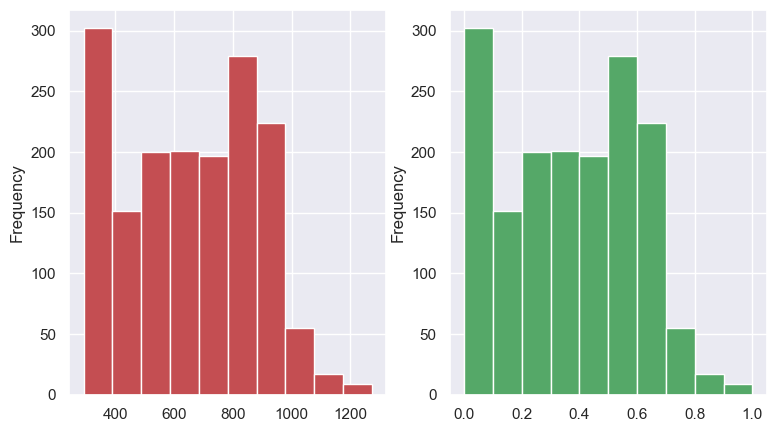

In [53]:
fig1, ax1 = plt.subplots(1,2, figsize=(9,5))

df2['temp'].plot(kind='hist', ax=ax1[0], color='r')
df2['temp_mxm'].plot(kind='hist', ax=ax1[1], color='g')

In [54]:
print(df2['temp_mxm'].min())
print(df2['temp_mxm'].max())

0.0
1.0


min and max shown

## `Standardization`

In [55]:
sc = '_std'
nums_std = []
for s in nums:
    s = s + sc
    nums_std.append(s)
print(nums_std)

['Cr_std', 'Ni_std', 'Mo_std', 'Mn_std', 'Si_std', 'Nb_std', 'Ti_std', 'Zr_std', 'Ta_std', 'V_std', 'W_std', 'Cu_std', 'N_std', 'C_std', 'B_std', 'P_std', 'S_std', 'Co_std', 'Al_std', 'Sn_std', 'Pb_std', 'temp_std', 'proof_stress_std', 'uts_std', 'elongation_std', 'sol_temp_std']


In [56]:
std_Scaler = preprocessing.StandardScaler()

std_Scaler.fit(df2[nums])

df2[nums_std] = std_Scaler.transform(df2[nums])
df2.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,...,S_std,Co_std,Al_std,Sn_std,Pb_std,temp_std,proof_stress_std,uts_std,elongation_std,sol_temp_std
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,-0.07496,-0.347715,0.119597,0.0,0.0,-1.620783,2.644018,1.867801,1.060915,1.068692
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,-0.07496,-0.347715,0.119597,0.0,0.0,-1.298939,1.848761,0.789396,0.378978,1.068692
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,-0.07496,-0.347715,0.119597,0.0,0.0,-0.869813,1.354413,0.408783,-0.145589,1.068692
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,-0.07496,-0.347715,0.119597,0.0,0.0,-0.440687,1.010518,0.387638,-0.198046,1.068692
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,...,-0.07496,-0.347715,0.119597,0.0,0.0,-0.011561,0.860064,0.387638,-0.093132,1.068692


<Axes: ylabel='Frequency'>

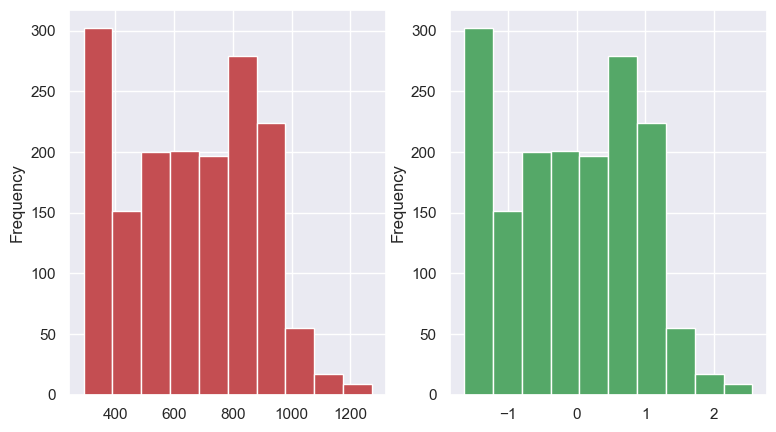

In [57]:
fig2, ax2 = plt.subplots(1,2, figsize=(9,5))

df2['temp'].plot(kind='hist', ax=ax2[0], color='r')
df2['temp_std'].plot(kind='hist', ax=ax2[1], color='g')

In [58]:
df2.temp_std.describe()

count    1.635000e+03
mean    -1.042999e-16
std      1.000306e+00
min     -1.642239e+00
25%     -8.698129e-01
50%     -1.156146e-02
75%      8.466900e-01
max      2.563193e+00
Name: temp_std, dtype: float64

standard deviation 'std' of ~1 shown

# `Visualization`

Now that our data is cleaned and prepared, we can move on to visualizing it.

Recap of our categorical and numerical columns:

In [59]:
cats

['water_quench', 'air_quench', 'melting_type', 'product_form']

In [60]:
nums

['Cr',
 'Ni',
 'Mo',
 'Mn',
 'Si',
 'Nb',
 'Ti',
 'Zr',
 'Ta',
 'V',
 'W',
 'Cu',
 'N',
 'C',
 'B',
 'P',
 'S',
 'Co',
 'Al',
 'Sn',
 'Pb',
 'temp',
 'proof_stress',
 'uts',
 'elongation',
 'sol_temp']

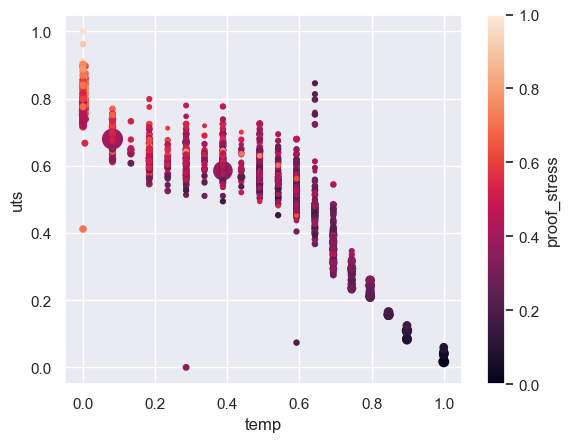

In [73]:
fig, ax3 = plt.subplots()

scatter_plot = ax3.scatter(x=df2.temp_mxm, y=df2.uts_mxm, s=df2.elongation_mxm*200, c=df2.proof_stress_mxm) # s scaled for better visuals

cbar = plt.colorbar(scatter_plot)
cbar.set_label('proof_stress')
ax3.set_xlabel('temp')
ax3.set_ylabel('uts')
plt.show()

This preliminary plot shows a correlation between temperature, ultimate tensile strength, and proof stress.  
As temperature increases, ultimate tensile strength and proof stress decrease; elongation increases slightly. 

Another observation was how outliers can easily be seen in the data.

`Making Plots With Hue of Categorical Columns Looking for Clusters`

In [63]:
# sns.pairplot(df2, vars=df2.loc[:, nums[0:21]].columns, hue='product_form_name')  # This is a lot of data to plot, so it takes a while (4-5 min) to load
# plt.show()

This inital pairplot has too much data to analyze like this, but we can look at some lines shown to see what physical elements might be good to focus on.

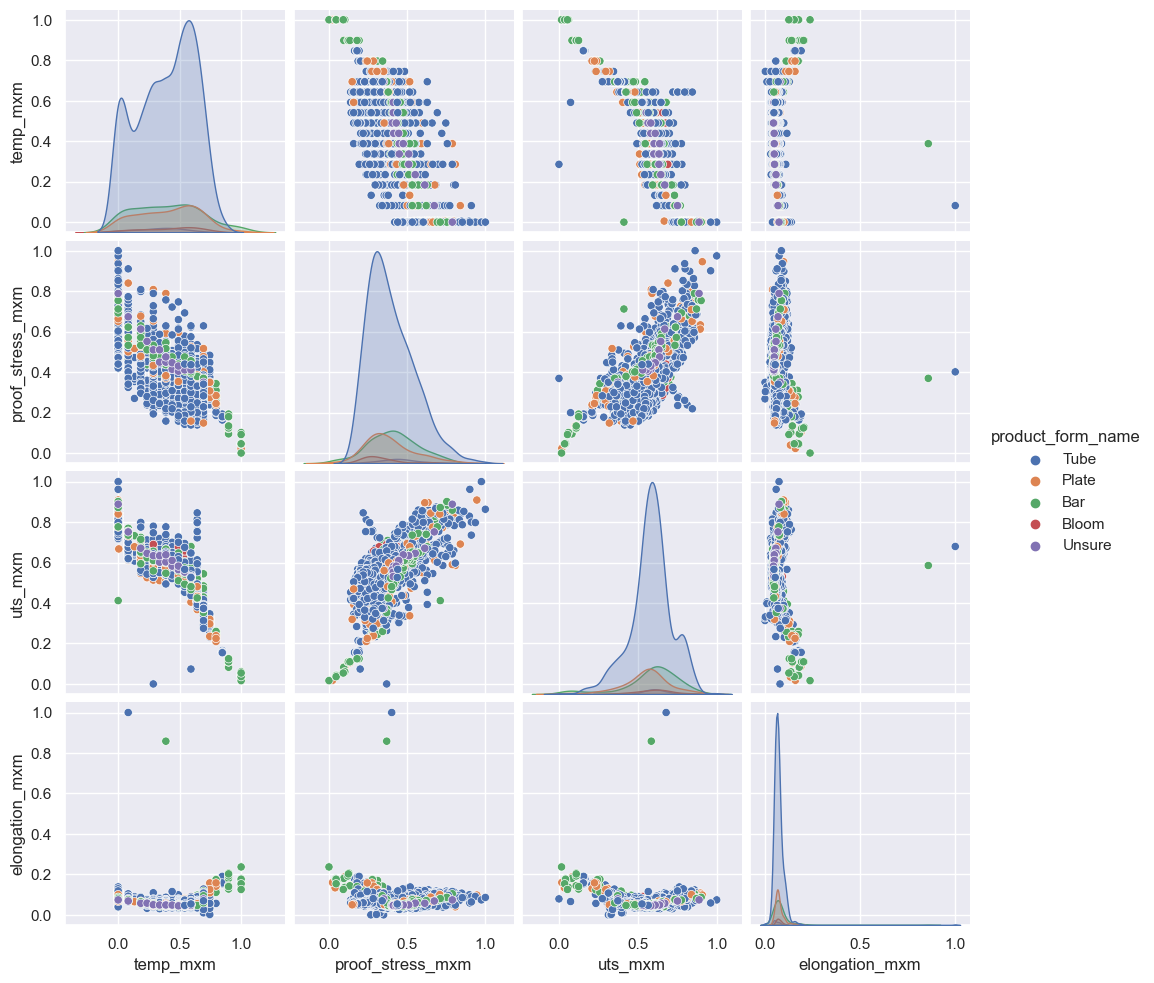

In [64]:
sns.pairplot(df2, vars=df2.loc[:, nums_mxm[21:25]].columns, hue='product_form_name')
plt.show()

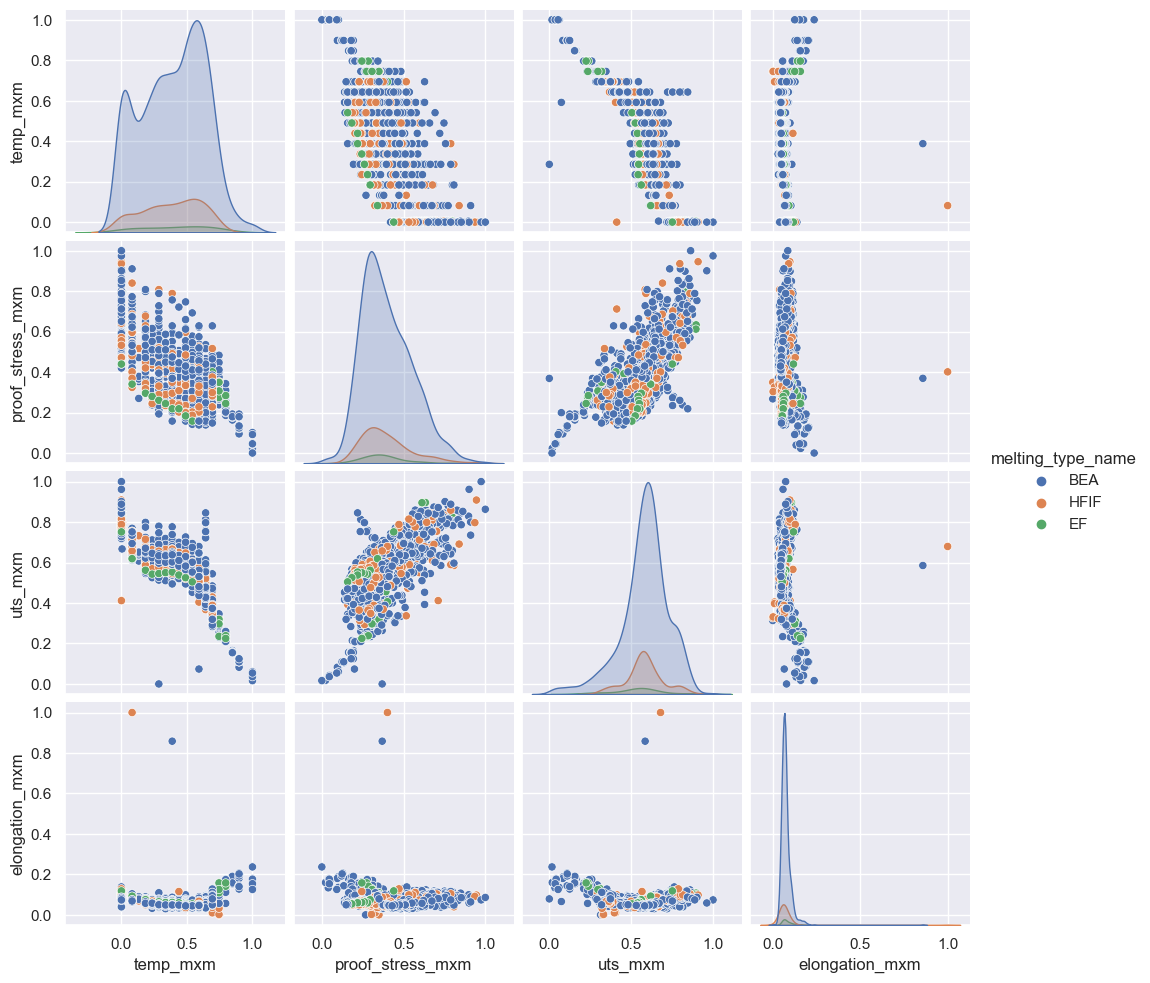

In [65]:
sns.pairplot(df2, vars=df2.loc[:, nums_mxm[21:25]].columns, hue='melting_type_name')
plt.show()

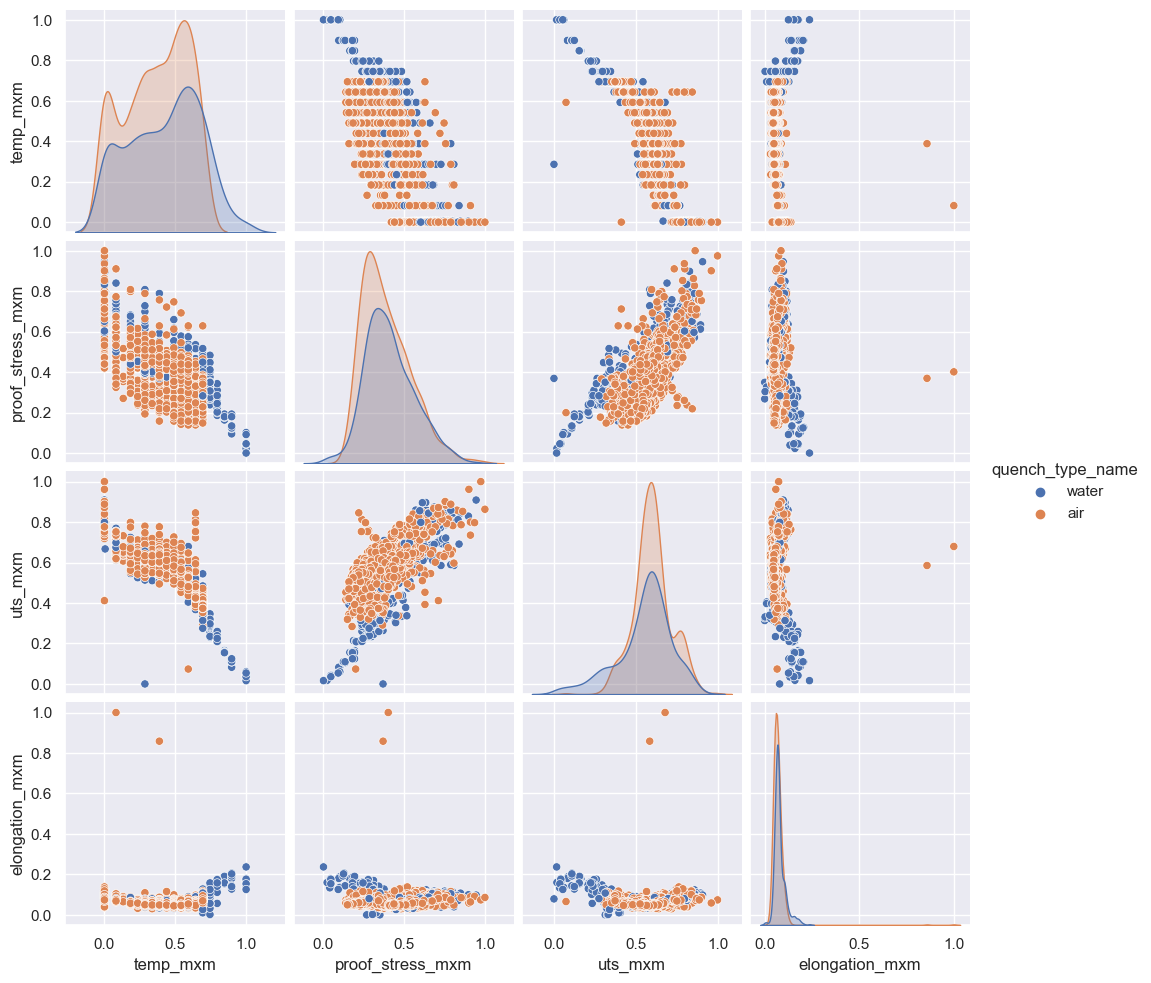

In [66]:
df2['quench_type_name'] = df2['water_quench'].apply(lambda x: 'water' if x else 'air') # add a column for easier human user readability and plotting

sns.pairplot(df2, vars=df2.loc[:, nums_mxm[21:25]].columns, hue='quench_type_name')
plt.show()

From the three smaller size / normal looking pair plots just shown, it can bee seen that Tube and BEA have high correlation while other product forms and meltling types do not have as much correlation.  
Also, water quenching definetly decreases the phyiscal properties of the material.

Additionally, the outliers are messing up the data. If the outliers were removed, we might see more correlation in the plots.

<Axes: xlabel='product_form_name', ylabel='count'>

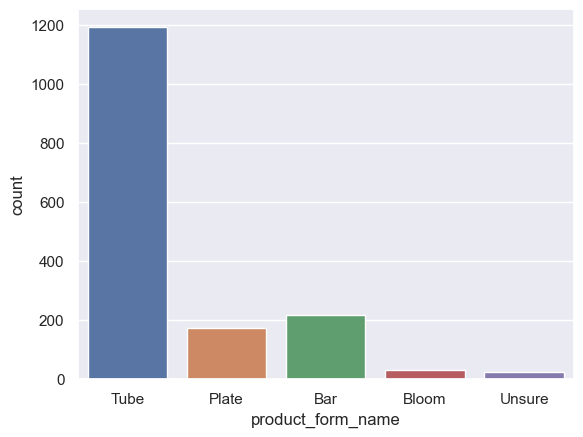

In [67]:
sns.countplot(data=df2, x='product_form_name')

<Axes: xlabel='melting_type_name', ylabel='count'>

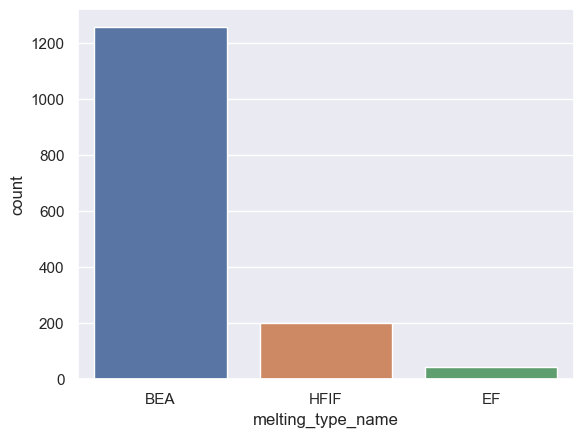

In [68]:
sns.countplot(data=df2, x='melting_type_name')

Now we can see that 'Tube' and 'BEA' were the most highly correlated because of the amount of data points they had, not because of real world condtions.
We may want to use these two types if we were to look at other correlations in the data.

<Axes: xlabel='quench_type_name', ylabel='count'>

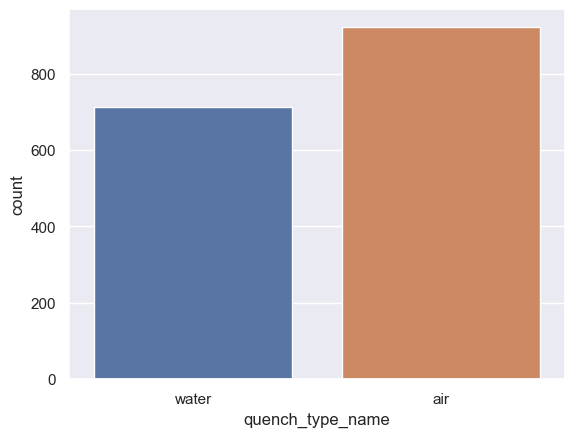

In [69]:
sns.countplot(data=df2, x='quench_type_name')

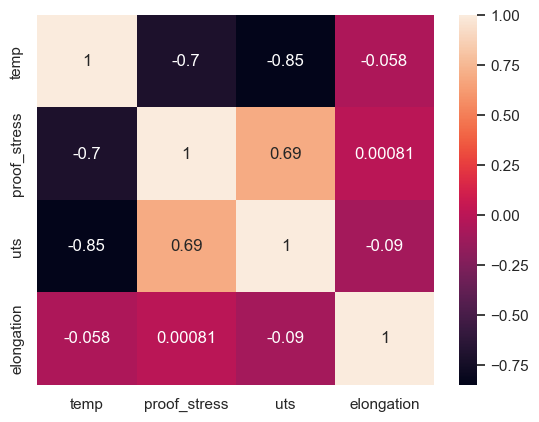

In [70]:
hm1 = sns.heatmap(df2[nums[21:25]].corr(), annot=True)

It can be seen that ultlimate tensile strength and proof stress are highly correlated, and elongation is not as correlated to other physical properties.

We can also lookat 

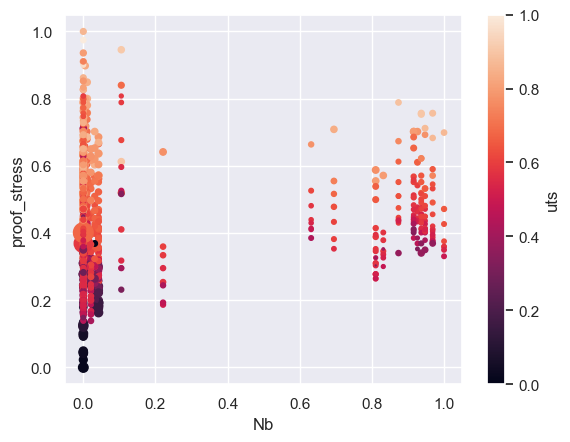

In [86]:
fig, ax4 = plt.subplots()

scatter_plot = ax4.scatter(x=df2.Nb_mxm, y=df2.proof_stress_mxm, s=df2.elongation_mxm*200, c=df2.uts_mxm) # s scaled for better visuals

cbar = plt.colorbar(scatter_plot)
cbar.set_label('uts')
ax4.set_xlabel('Nb')
ax4.set_ylabel('proof_stress')
plt.show()

We can see that for the alloys, the more Niobium in it, the there is generally more stable proof stress and ultimate tensile strength. This can just be due to lower amount of data points at the higher end of Niobium though, and each element must be looked at to ensure accurate conclusions.

<Axes: xlabel='melting_type_name', ylabel='proof_stress_mxm'>

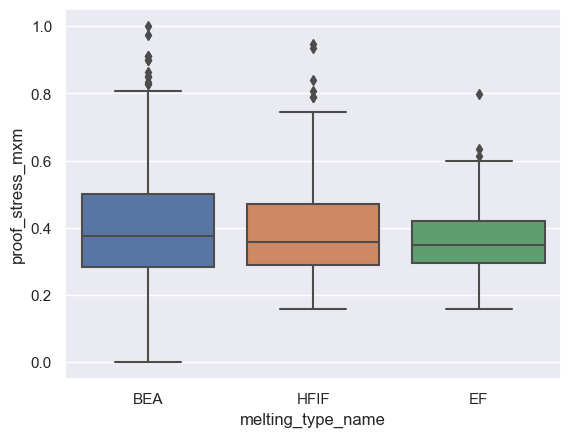

In [91]:
sns.boxplot(data=df2, x='melting_type_name', y='proof_stress_mxm')

One more thing that we were just able to see with this box plot is that the 'EF' melting type has a more closely distributed proof stress than the other melting types. This could be indicative that EF is a more consistent melting type than the others.